In [2]:
import pandas as pd


In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"C:\Users\mei88\OneDrive\桌面\MBAN 6110S-Data Science\assignment1\sales_data.csv")

In [7]:
#Method and process
    # -created columns "Sales" and "Month
    # -Filled in the null cells in "Price" column with the average price by "Product"
    # -using scatter plot and box plot to look at the data distribution
    # -dropped duplicates
    # -dropped outlier with sales  greater than 10,000

#Analyzed 
    # - sales by month
    # - sales by product
    # - sales by region
    # - Sales by Price & Region
    # - Sales by region with lines by product

#conclustion. 

    # -March, July, October and December have higher sales  &  Feburaty, May and September have the lowest sales

    # -top 5 region is Region 10,4,5,8,9 & the least sale regions are Region 1,3,6,7,and those without regions identified. 

    # -top 10 products are : Product 14,23,26,29,31,35,41,48,50 and thoese products without identified. 


#Recomendation 

    # -promotion & marketing campagins aiming sales in March, July, October and December 
    # -Promotion & marketing campagins and resouces are more reallocated  on Region 10,4,5,8,9. 

    # -Promotion & marketing campagins and resouces are reallocated by product and region
    #	* Region 10 ,products: other,14, 29, 8,13
    #	* Region 4, products: 14,13,31,16,50
    #	* Region 5, products: others, 29,37,6,10
    #	* Region 8: products: 50,10,23,48,4,
    #	* Region 9: products: 2,10,4,34
    #- for those products have limited sales in certain region, we can reduct the resouce or consider to remove certain products from certain region. 


In [8]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [10]:
df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [11]:
average_prices = df.groupby('Product')['Price'].transform('mean')
print(average_prices)

0              NaN
1              NaN
2       101.934118
3        80.066667
4        96.292632
           ...    
1045    108.686296
1046     90.580455
1047     96.292632
1048           NaN
1049     99.276316
Name: Price, Length: 1050, dtype: float64


In [12]:
df['Price'].fillna(average_prices, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       1038 non-null   float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [14]:
# I personally think "Unit Sold=Null" is meaningless for my analysis, since no product sold
# remove "units sold" = null cells
df = df.dropna(subset=['Units Sold'], axis=0)

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1045     True
1046     True
1047     True
1048     True
1049     True
Length: 946, dtype: bool

In [16]:
#drop duplicates
df.drop_duplicates(inplace=True)

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\3249509987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [17]:
#add a column "Sales"

df["Sales"] = df["Price"] * df["Units Sold"]

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\2285521037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = df["Price"] * df["Units Sold"]


In [18]:
df.loc[:, "Sales"] = df["Price"] * df["Units Sold"]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     809 non-null    object 
 1   Region      813 non-null    object 
 2   Price       891 non-null    float64
 3   Units Sold  900 non-null    float64
 4   Sale Date   900 non-null    object 
 5   Sales       891 non-null    float64
dtypes: float64(3), object(3)
memory usage: 49.2+ KB


<Axes: xlabel='Sales', ylabel='Count'>

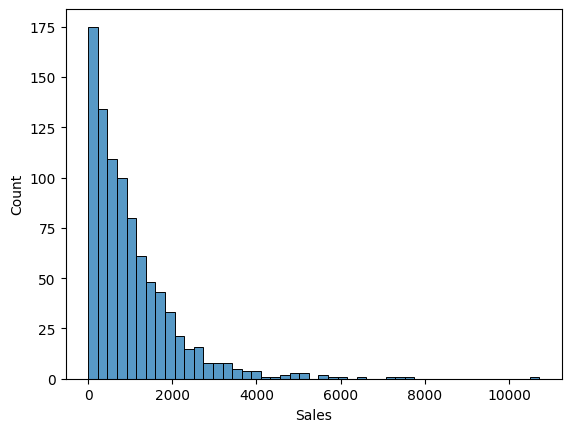

In [20]:
# check sales value distribution 
sns.histplot(df['Sales'])

In [21]:

#remove all the rows for "sales" value is missing
df.dropna(subset=['Sales'], axis=0, inplace=True)

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\1537481873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Sales'], axis=0, inplace=True)


In [22]:
# fillin missing value in "Region" as "no_region"
df['Region'] = df['Region'].fillna("no_region")

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\3517383040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Region'].fillna("no_region")


In [23]:
# fillin missing value in "Product" as "Other"
df['Product'] = df['Product'].fillna("Other")

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\3560967652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product'] = df['Product'].fillna("Other")


In [24]:
df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date,Sales
count,891,891,891.000000,891.000000,891,891.000000
unique,51,11,NaN,NaN,891,NaN
top,Other,Region_9,NaN,NaN,2022-01-01,NaN
freq,82,94,NaN,NaN,1,NaN
mean,NaN,NaN,106.066831,10.068462,NaN,1042.577895
std,NaN,NaN,119.276087,3.162779,NaN,1098.941128
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,32.145000,8.000000,NaN,291.460000
50%,NaN,NaN,82.520000,10.000000,NaN,759.480000
75%,NaN,NaN,138.106250,12.000000,NaN,1395.590000


<Axes: xlabel='Region', ylabel='Sales'>

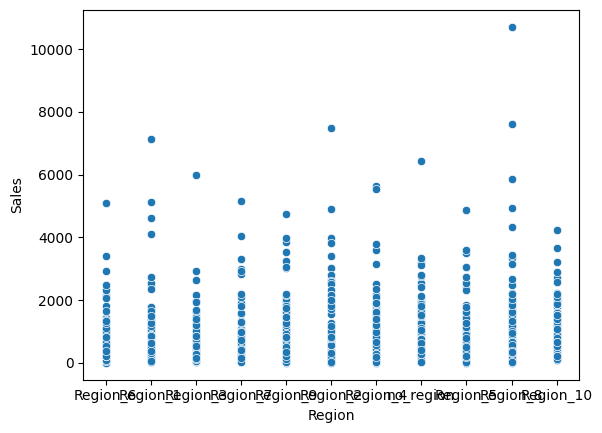

In [25]:
# identify outliers , sales =10716.5
sns.scatterplot(data=df, x="Region", y="Sales")

In [26]:
# drop outliers
df_outliers = df[df['Sales'] >= 10000]

<Axes: xlabel='Region', ylabel='Sales'>

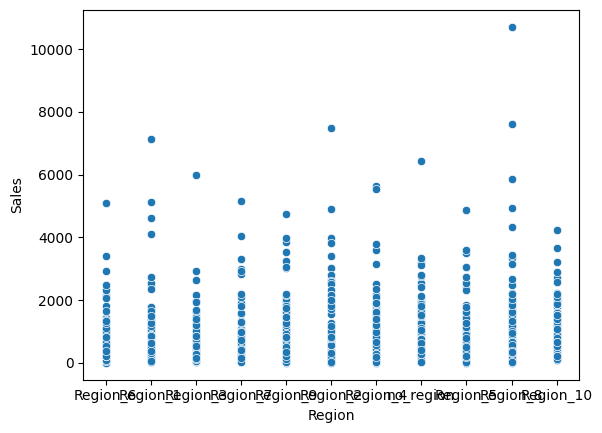

In [27]:
sns.scatterplot(data=df, x="Region", y="Sales")

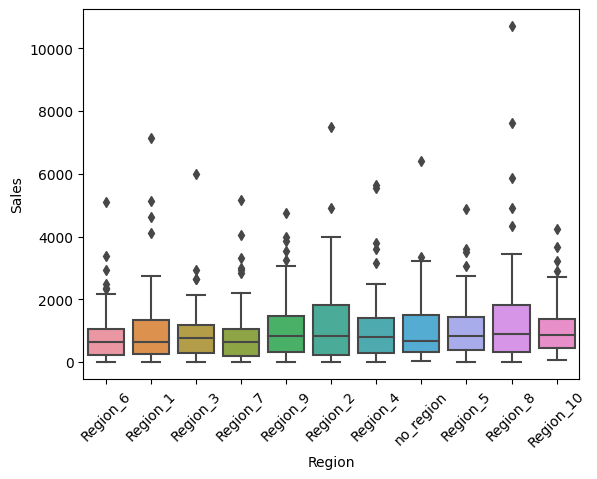

In [28]:
# from the boxplot,  
sns.boxplot(data=df, x="Region", y="Sales")
plt.xticks(rotation=45)
plt.show()

In [29]:
# I decided to remove the values of "Sales" > 10000.
df.drop(df[df['Sales'] >= 10000].index, inplace=True)

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\1931560816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Sales'] >= 10000].index, inplace=True)


In [30]:
#create a column called " month " which is extracted from column "sales date"
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df["month"] =  df["Sale Date"].dt.month

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\1174181352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale Date'] = pd.to_datetime(df['Sale Date'])
C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\1174181352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] =  df["Sale Date"].dt.month


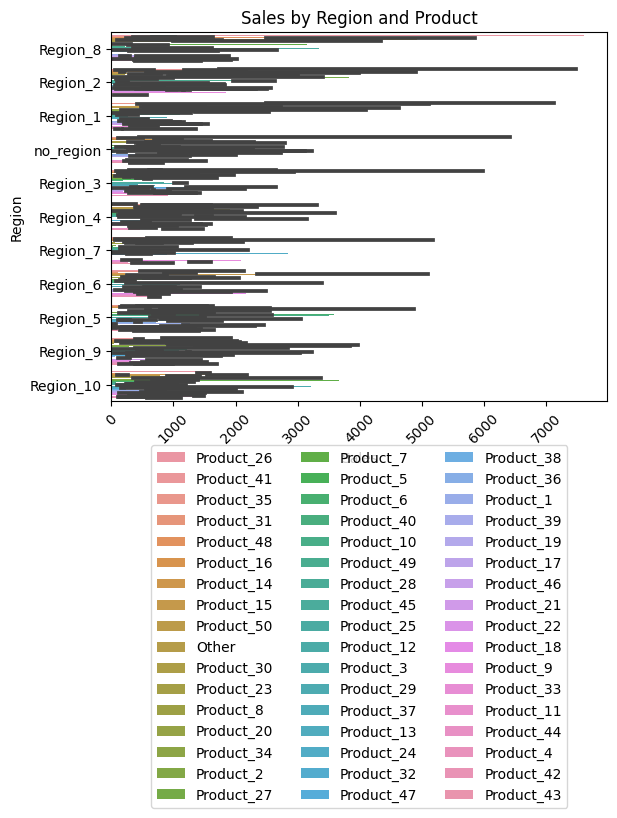

In [31]:
# create visuliazed charts
df_sorted = df.sort_values(by='Sales', ascending=False)
sns.barplot(x='Sales', y='Region', hue='Product', data=df_sorted)
plt.title('Sales by Region and Product')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()

In [32]:
print(df_sorted)

        Product     Region   Price  Units Sold  Sale Date    Sales  month
437  Product_26   Region_8  585.17        13.0 2023-03-14  7607.21      3
814  Product_26   Region_2  623.60        12.0 2024-03-25  7483.20      3
853  Product_41   Region_1  713.29        10.0 2024-05-03  7132.90      5
119  Product_35  no_region  401.31        16.0 2022-04-30  6420.96      4
728  Product_31   Region_3  665.00         9.0 2023-12-30  5985.00     12
..          ...        ...     ...         ...        ...      ...    ...
486       Other   Region_2    0.58         8.0 2023-05-02     4.64      5
456  Product_26   Region_4    0.20        14.0 2023-04-02     2.80      4
347   Product_9   Region_5    0.31         9.0 2022-12-14     2.79     12
201  Product_24   Region_4    0.22        10.0 2022-07-21     2.20      7
397  Product_10   Region_9    0.33         3.0 2023-02-02     0.99      2

[890 rows x 7 columns]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     890 non-null    object        
 1   Region      890 non-null    object        
 2   Price       890 non-null    float64       
 3   Units Sold  890 non-null    float64       
 4   Sale Date   890 non-null    datetime64[ns]
 5   Sales       890 non-null    float64       
 6   month       890 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 52.1+ KB


In [34]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales,month
0,Other,Region_6,75.96,10.0,2022-01-01,759.60,1
1,Other,Region_1,175.78,8.0,2022-01-02,1406.24,1
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16,1
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70,1
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14,1
...,...,...,...,...,...,...,...
995,Other,Region_7,31.83,13.0,2024-09-22,413.79,9
996,Product_36,no_region,46.19,9.0,2024-09-23,415.71,9
997,Other,Region_7,311.80,13.0,2024-09-24,4053.40,9
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60,9


<Axes: xlabel='Region'>

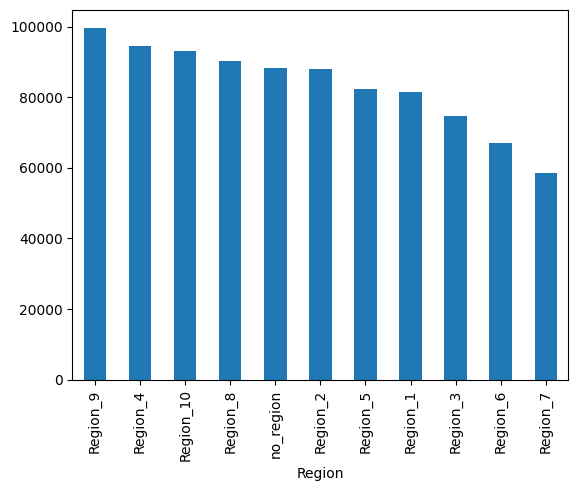

In [35]:
df_sorted.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product'>

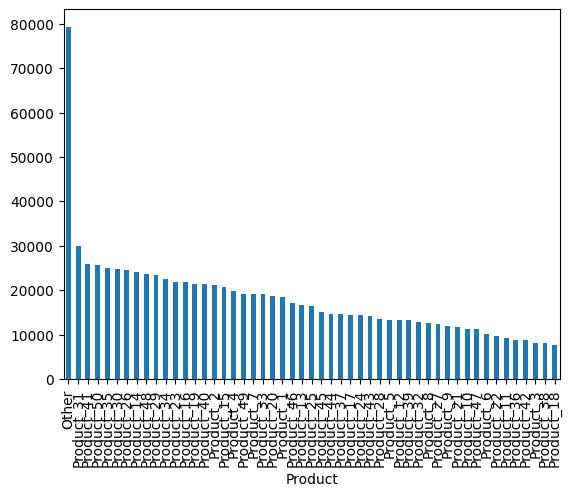

In [36]:
df_sorted.groupby('Product')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

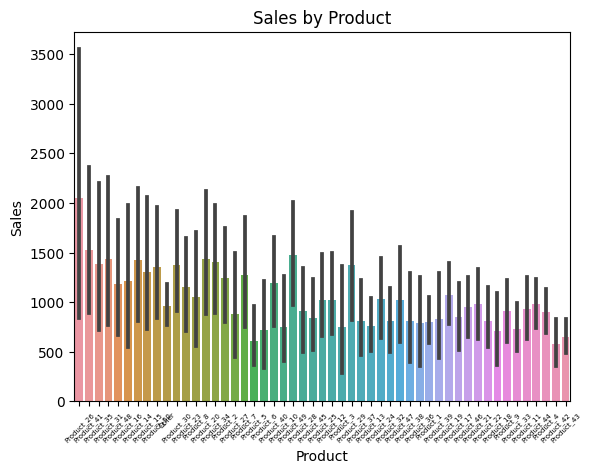

In [37]:
# by product
df_sorted = df.sort_values(by='Sales', ascending=False)
sns.barplot(y='Sales', x='Product', data=df_sorted)
plt.title('Sales by Product')
plt.ylabel('Sales')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.xticks(fontsize=5)
plt.show()

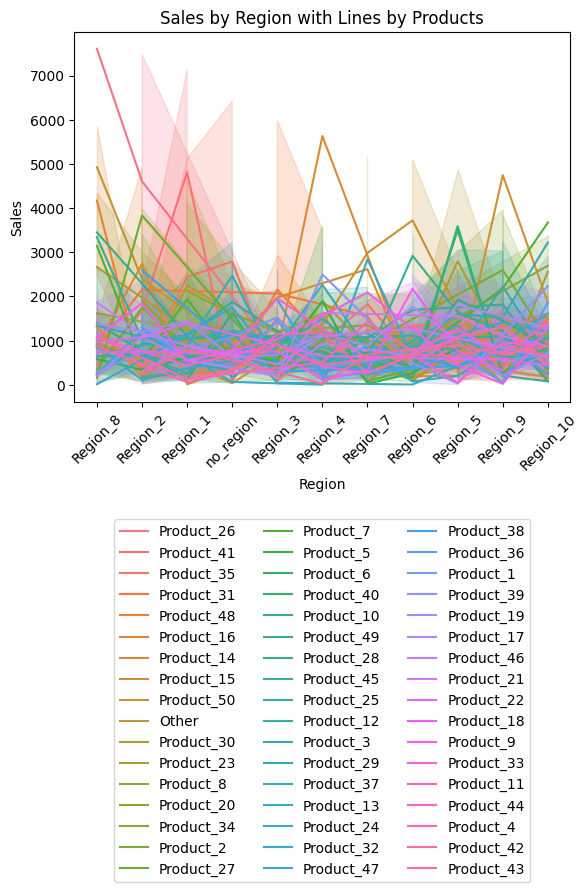

In [38]:
df_sorted = df.sort_values(by='Sales', ascending=False)
sns.lineplot(x='Region', y='Sales', hue='Product', data=df_sorted)
plt.title('Sales by Region with Lines by Products')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

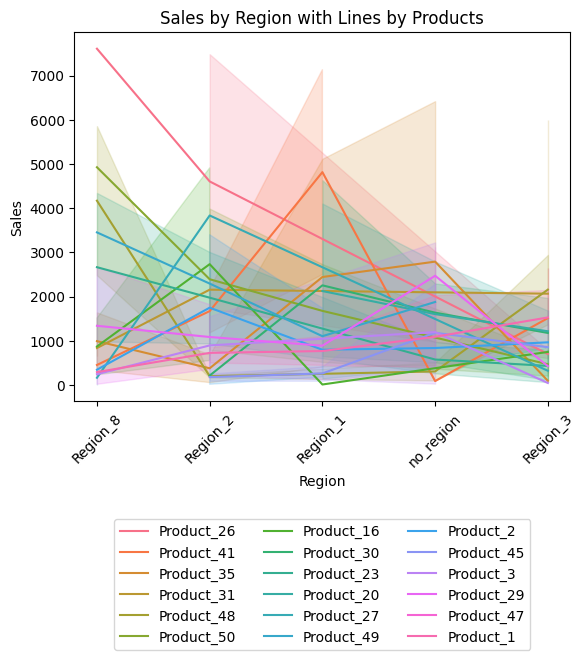

In [39]:
#top 5 products in top 5 regions and last 5 products in last 5 regions
df_sorted = df.sort_values(by='Sales', ascending=False)
top_regions = df_sorted['Region'].head(5).tolist()
top_products = df_sorted[df_sorted['Region'].isin(top_regions)].groupby('Region').head(5)['Product'].tolist()

filtered_df = df_sorted.loc[(df_sorted['Region'].isin(top_regions) & df_sorted['Product'].isin(top_products))]

sns.lineplot(x='Region', y='Sales', hue='Product', data=filtered_df)
plt.title('Sales by Region with Lines by Products')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

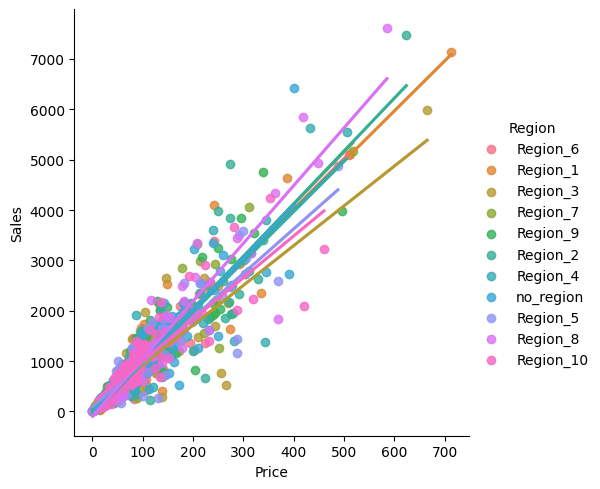

In [40]:
# Region8 is the least price sensitive, we can target region 8 for higher price product

sns.lmplot(x="Price",
        y="Sales",
        data=df,
        hue="Region",
        ci=None)

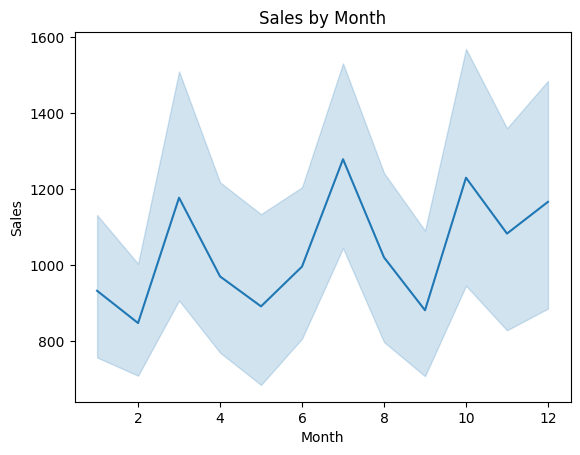

In [41]:
# sales by month 
# March, July, Oct, and December have the higher sales
sns.lineplot(x="month",
        y="Sales",
        data=df)      
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()

In [42]:

product_region_sales = df.groupby(['Product', 'Region'])['Sales'].sum().reset_index()
product_region_sales


,Product,Region,Sales
0,Other,Region_1,10654.560000
1,Other,Region_10,10323.300000
2,Other,Region_2,3241.200000
3,Other,Region_3,6908.580000
4,Other,Region_4,5912.480000
...,...,...,...
429,Product_9,Region_3,3094.007143
430,Product_9,Region_5,885.510000
431,Product_9,Region_7,2091.540000
432,Product_9,Region_8,1073.970000


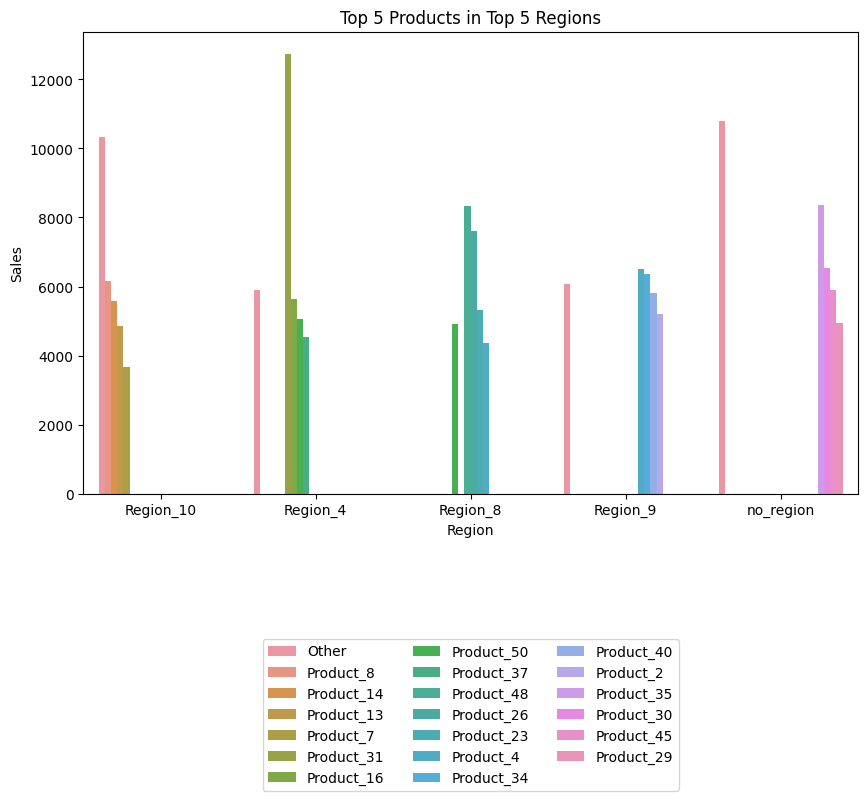

In [43]:
#  best selling "Product" in top 5 "Region" in seaborn
product_region_sales = df.groupby(['Product', 'Region'])['Sales'].sum().reset_index()
top_regions = df.groupby('Region')['Sales'].sum().nlargest(5).index
top_regions_data = product_region_sales[product_region_sales['Region'].isin(top_regions)]
top_products_by_region = top_regions_data.groupby('Region').apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Product', data=top_products_by_region)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Top 5 Products in Top 5 Regions')
plt.legend(title='Product')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

In [44]:
product_region_sales.describe(include="all")

,Product,Region,Sales
count,434,434,434.000000
unique,51,11,NaN
top,Other,Region_10,NaN
freq,11,44,NaN
mean,NaN,NaN,2115.715218
std,NaN,NaN,2010.094295
min,NaN,NaN,2.200000
25%,NaN,NaN,669.990000
50%,NaN,NaN,1502.432500
75%,NaN,NaN,2921.080000


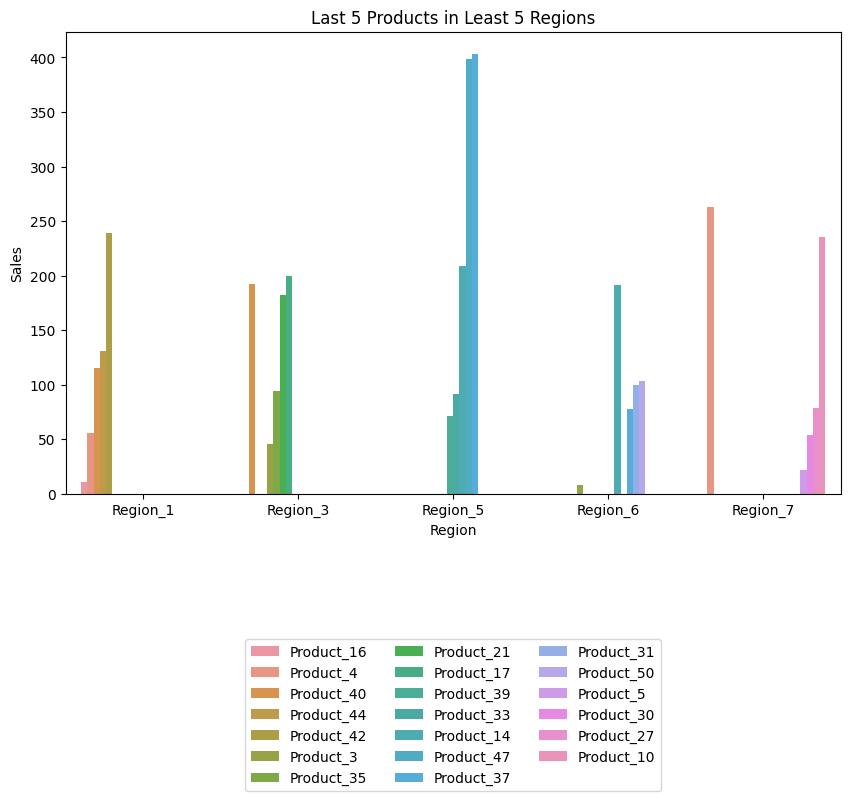

In [45]:
# least-selling 5 products in least 5 regions
product_region_sales = df.groupby(['Product', 'Region'])['Sales'].sum().reset_index()
least_regions = df.groupby('Region')['Sales'].sum().nsmallest(5).index
least_regions_data = product_region_sales[product_region_sales['Region'].isin(least_regions)]
last_products_by_region = least_regions_data.groupby('Region').apply(lambda x: x.nsmallest(5, 'Sales')).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Product', data=last_products_by_region)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Last 5 Products in Least 5 Regions')
plt.legend(title='Product')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

C:\Users\mei88\AppData\Local\Temp\ipykernel_8700\3928016920.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', hue='Product', data=top_10_products_data, ci=None)


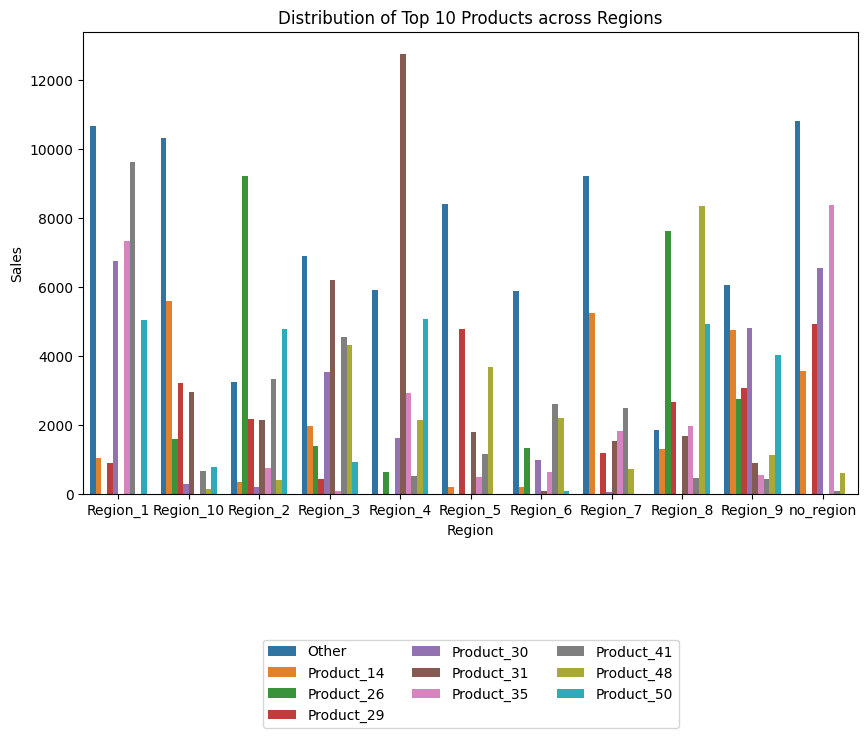

In [46]:
# The distribution of the top 10 best selling products. 
product_region_sales = df.groupby(['Product', 'Region'])['Sales'].sum().reset_index()
top_10_products = product_region_sales.groupby('Product')['Sales'].sum().nlargest(10).sort_values(ascending=False).index
top_10_products_data = product_region_sales[product_region_sales['Product'].isin(top_10_products)]
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Product', data=top_10_products_data, ci=None)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Distribution of Top 10 Products across Regions')
plt.legend(title='Product')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()


Method and process:

To clean data, I looked at the data distribution and quality first by using scatter plot and box plot,  dropped outliers and illed in the null cells in. I also checked and dropped the duplicates, I do not think rows without value in "Unit Sold" column contribute to our analysis, so I removed those rows as well. I also created columns "Sales" and "Month for further analysis, since is sales is the best way to evaluate the performance. I only dropped outlier with sales  greater than 10,000 to maximize the data samples. 

Analyzed: 

I conducted below analysis to identify the best time, top-selling products, and top-selling regions, also their correlations. Meanwhile, I also conducted a linear regression with "Price" and "Sales" including "Regions" to find out the best price-tolerant regions for further marketing activities. 
    - sales by month
    - sales by product
    - sales by region
    - Sales by Price & Region
    - Sales by region with lines by product

#conclustion:

I have draw three major conclusion from my analysis. 

    -March, July, October and December have higher sales  &  Feburaty, May and September have the lowest sales

    -top 5 region is Region 10,4,5,8,9 & the least sale regions are Region 1,3,6,7,and those without regions identified. 

    -top 10 products are : Product 14,23,26,29,31,35,41,48,50 and thoese products without identified. 


#Recomendation:

Based on the conclusion, my recommendation are listed as below. 

    -promotion & marketing campagins aiming sales in March, July, October and December 
    -Promotion & marketing campagins and resouces are more reallocated  on Region 10,4,5,8,9. 
    -Promotion & marketing campagins and resouces are reallocated by product and region
    - Region 10 ,products: other,14, 29, 8,13
    - Region 4, products: 14,13,31,16,50
    - Region 5, products: others, 29,37,6,10
    - Region 8: products: 50,10,23,48,4,
    - Region 9: products: 2,10,4,34
    - for those products have limited sales in certain region, we can reduct the resouce or consider to remove certain products from certain region. 
